In [62]:
# Import the required libraries and dependencies
import os
import requests
import json
import numpy as ny
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import matplotlib.pyplot as plt

In [63]:
# Load your keys- Mine are in an .env file
load_dotenv()

Python-dotenv could not parse statement starting at line 1


True

## Set up our example

In [64]:
# The monthly amount for the member's household income
monthly_income = 12000

In [65]:
# Set the current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

## Part 1: Evaluate the Cryptocurrency Wallet by Using the Requests Library

#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [66]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC)by using the API endpoints that the starter code supplied.

In [67]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review response data 
# Set the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=3, sort_keys=True))

{
   "data": {
      "1": {
         "circulating_supply": 18869743,
         "id": 1,
         "last_updated": 1636601318,
         "max_supply": 21000000,
         "name": "Bitcoin",
         "quotes": {
            "USD": {
               "market_cap": 1221622840282,
               "percent_change_1h": 0.542166203473858,
               "percent_change_24h": -2.51787422154566,
               "percent_change_7d": 2.85296908774107,
               "percentage_change_1h": 0.542166203473858,
               "percentage_change_24h": -2.51787422154566,
               "percentage_change_7d": 2.85296908774107,
               "price": 64932.0,
               "volume_24h": 50206670719
            }
         },
         "rank": 1,
         "symbol": "BTC",
         "total_supply": 18869743,
         "website_slug": "bitcoin"
      }
   },
   "metadata": {
      "error": null,
      "num_cryptocurrencies": 3105,
      "timestamp": 1636601318
   }
}


#### Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [68]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response["data"]['1']['quotes']['USD']["price"]

# Print the current price of BTC
btc_price

64932.0

#### Repeatfor Ethereum

In [69]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=3, sort_keys=True))

{
   "data": {
      "1027": {
         "circulating_supply": 118293210,
         "id": 1027,
         "last_updated": 1636601254,
         "max_supply": 0,
         "name": "Ethereum",
         "quotes": {
            "USD": {
               "market_cap": 547419207133,
               "percent_change_1h": 0.939015822170275,
               "percent_change_24h": -1.57212101697933,
               "percent_change_7d": 0.811842097753344,
               "percentage_change_1h": 0.939015822170275,
               "percentage_change_24h": -1.57212101697933,
               "percentage_change_7d": 0.811842097753344,
               "price": 4645.11,
               "volume_24h": 25498300685
            }
         },
         "rank": 2,
         "symbol": "ETH",
         "total_supply": 118293210,
         "website_slug": "ethereum"
      }
   },
   "metadata": {
      "error": null,
      "num_cryptocurrencies": 3105,
      "timestamp": 1636601254
   }
}


In [70]:
# Navigate the ETH response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
eth_price

4645.11

### Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [71]:
# Build a Series to hold our BTC and ETH values
btc_value=pd.Series(data=[btc_coins, btc_price, (btc_coins*btc_price)], index= ['coins', 'curr_mkt_price', 'total value'])
type(btc_value)

pandas.core.series.Series

In [72]:
# Compute the current value of the BTC holding 
eth_value=pd.Series(data=[eth_coins, eth_price, (eth_coins*eth_price)], index= ['coins', 'curr_mkt_price', 'total value'])
eth_value

coins                 5.300
curr_mkt_price     4645.110
total value       24619.083
dtype: float64

In [73]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
crypto_value= pd.concat([btc_value , eth_value],axis=1)

# Print current cryptocurrency wallet balance
crypto_value= crypto_value.rename(columns={0:'btc',1:'eth'})
crypto_value=crypto_value.transpose()
crypto_value

,coins,curr_mkt_price,total value
btc,1.2,64932.00,77918.400
eth,5.3,4645.11,24619.083


In [74]:
total_crypto_wallet=crypto_value['total value'].sum()
total_crypto_wallet

102537.483

### Part 2: Evaluate the Stock and Bond Holdings by Using the Alpaca SDK


5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [75]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200

Step 1: Pull the .env file into the current directory

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [76]:
# Set the variables for the Alpaca API and secret keys
alpaca_key=os.getenv('alpaca_key')
alpaca_secret_key=os.getenv('alpaca_secret_key')

# Create the Alpaca tradeapi.REST object. Pass in as parameters the API key, secret key, and version number.
alpaca = tradeapi.REST(
alpaca_key,
alpaca_secret_key,
api_version='v2')

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This isto get the one closing price for the most-recent trading day.


In [77]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers= ["SPY","AGG"]

# Set timeframe to 1D 
timeframe="1D"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday to provide the closing price of the previous trading day
start_date=pd.Timestamp("2021-10-22",tz="America/New_York").isoformat()
end_date=pd.Timestamp("2021-10-22",tz="America/New_York").isoformat()

#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

In [78]:
# Use the Alpaca get_barset function to get current closing prices the portfolio. don't forget to add '.df' at the end.
df_portfolio=alpaca.get_barset(
tickers,
timeframe,
start=start_date,
end=end_date,
).df

# Review the first 5 rows of the Alpaca DataFrame
df_portfolio.head()

AGG                                         SPY  \
                             open      high      low   close   volume    open   
time                                                                            
2021-10-22 00:00:00-04:00  113.97  114.1399  113.895  114.07  3309637  453.13   

                                                             
                             high     low   close    volume  
time                                                         
2021-10-22 00:00:00-04:00  454.67  451.05  453.13  50771701

#### Step 5: Navigating the Alpaca response DataFrame and select the `SPY` and `AGG` closing prices.

In [79]:
# Analyze these closing prices

In [80]:
#Create an empty DataFrame for closing prices
closing_prices_df = pd.DataFrame()

# Get the closing prices of AGG and SPY
closing_prices_df['AGG'] = df_portfolio["AGG"]['close']
closing_prices_df['SPY'] = df_portfolio["SPY"]['close']

# Drop the time component of the date
closing_prices_df.index = closing_prices_df.index.date

# Check your work
closing_prices_df.head()

,AGG,SPY
2021-10-22,114.07,453.13


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [81]:
### Add the number of shares variable to the data frame
### Calculate the total value of each position in the DataFrame
new_closing_prices_df=closing_prices_df.transpose()
new_closing_prices_df['shares']=[agg_shares,spy_shares]
new_closing_prices_df.columns=['mkt price', 'shares']
new_closing_prices_df.head()

,mkt price,shares
AGG,114.07,200
SPY,453.13,110


In [82]:
# Calculate the current value of the stock portion of the portfolio
new_closing_prices_df['total value']=new_closing_prices_df['mkt price']*new_closing_prices_df['shares']
new_closing_prices_df

,mkt price,shares,total value
AGG,114.07,200,22814.0
SPY,453.13,110,49844.3


In [83]:
# Calculate the total value of the stock and bond portion of the portfolio
stocks_bonds_value= new_closing_prices_df['total value'].sum()

# Print the current balance of the stock and bond portion of the portfolio
stocks_bonds_value

72658.3

In [84]:
# Remember the crypto_value
total_crypto_wallet

102537.483

In [85]:
# Calculate the total value of the member's entire portfolio
portfolio=stocks_bonds_value+total_crypto_wallet
portfolio

175195.783

### Part 3: Evaluate the Emergency Fund

#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [86]:
# Consolidate financial assets data 
new_closing_prices_df=new_closing_prices_df.rename(columns={'shares':'units'})
new_closing_prices_df=new_closing_prices_df[['units','mkt price', 'total value']]
new_closing_prices_df


,units,mkt price,total value
AGG,200,114.07,22814.0
SPY,110,453.13,49844.3


In [87]:
# Review the Python list savings_data
crypto_value=crypto_value.rename(columns={'coins':'units', 'curr_mkt_price':'mkt price'})
crypto_value

,units,mkt price,total value
btc,1.2,64932.00,77918.400
eth,5.3,4645.11,24619.083


In [88]:
# Take a look at your complete portfolio
total_portfolio=pd.concat([new_closing_prices_df, crypto_value])
total_portfolio

,units,mkt price,total value
AGG,200.0,114.07,22814.000
SPY,110.0,453.13,49844.300
btc,1.2,64932.00,77918.400
eth,5.3,4645.11,24619.083


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Members Total Portfolio'}, ylabel='total value'>

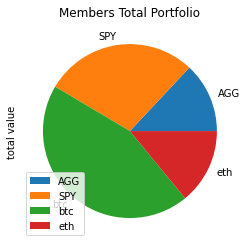

In [106]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
total_portfolio.plot(kind="pie", y='total value', title="Members Total Portfolio")

#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [ ]:
# Create a variable named emergency_fund_value
emergency_fund_value = monthly_income * 3
emergency_fund_value

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [ ]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
# YOUR CODE HERE
# YOUR CODE HERE
# YOUR CODE HERE


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [ ]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
# YOUR CODE HERE
# YOUR CODE HERE

# Set number of rows to 1000 to retrieve the maximum amount of rows
# YOUR CODE HERE

In [ ]:
# Use the Alpaca get_barset function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
# YOUR CODE HERE


# Display both the first and last five rows of the DataFrame
# YOUR CODE HERE
# YOUR CODE HERE


#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [ ]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
# YOUR CODE HERE

# Review the simulation input data
# YOUR CODE HERE


In [ ]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE


In [ ]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

In [ ]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [ ]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE


# Review the 30-year Monte Carlo summary statistics
# YOUR CODE HERE

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [ ]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE


In [ ]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = # YOUR CODE HERE
ci_upper_thirty_cumulative_return = # YOUR CODE HERE

# Print the result of your calculations
# YOUR CODE HERE


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [ ]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
# YOUR CODE HERE

# Review the simulation input data
# YOUR CODE HERE


In [ ]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE


In [ ]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE


In [ ]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE


In [ ]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE


# Review the 10-year Monte Carlo summary statistics
# YOUR CODE HERE

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [ ]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE


In [ ]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = # YOUR CODE HERE
ci_upper_ten_cumulative_return = # YOUR CODE HERE

# Print the result of your calculations
# YOUR CODE HERE


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?